In [1]:
!pip install wordcloud

#Importing libraries

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string

# Load Data

In [3]:
df = pd.read_csv('/content/train.csv', quotechar='"', on_bad_lines='skip', header=None)

df.columns = ['Label', 'Title', 'Review']

df

,Label,Title,Review
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
...,...,...,...
3599995,1,Don't do it!!,The high chair looks great when it first comes...
3599996,1,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...
3599997,1,"compact, but hard to clean","We have a small house, and really wanted two o..."
3599998,1,what is it saying?,not sure what this book is supposed to be. It ...


#Data Exploration and Cleaning

In [4]:
df.head()

,Label,Title,Review
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [5]:
df.tail()

,Label,Title,Review
3599995,1,Don't do it!!,The high chair looks great when it first comes...
3599996,1,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...
3599997,1,"compact, but hard to clean","We have a small house, and really wanted two o..."
3599998,1,what is it saying?,not sure what this book is supposed to be. It ...
3599999,2,Makes My Blood Run Red-White-And-Blue,I agree that every American should read this b...


In [6]:
df.sample(2)

,Label,Title,Review
3290134,1,what happened,All of these west coast rappers such as mc eih...
3300201,2,Great C# Aid,Jesse has done it again. In the style of his C...


In [7]:
df.describe()

,Label
count,3600000.0
mean,1.5
std,0.5
min,1.0
25%,1.0
50%,1.5
75%,2.0
max,2.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Label   int64 
 1   Title   object
 2   Review  object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


In [9]:
df.shape

(3600000, 3)

In [10]:
df.isnull()

,Label,Title,Review
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
3599995,False,False,False
3599996,False,False,False
3599997,False,False,False
3599998,False,False,False


In [11]:
df.isnull().sum()

,0
Label,0
Title,207
Review,0


In [12]:
d = df.isnull().sum()
d [d>0]

,0
Title,207


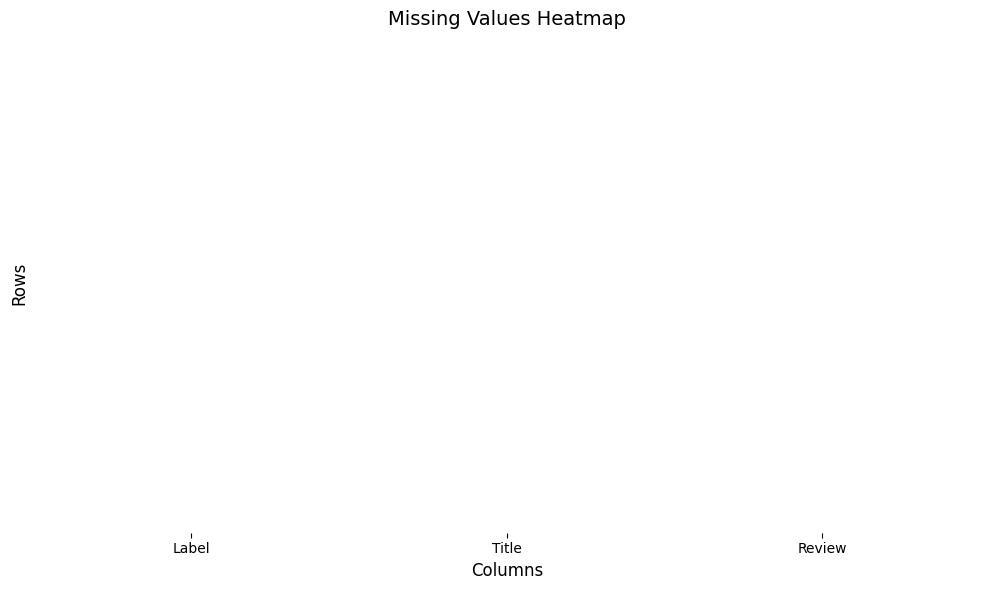

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(),
            cmap="Reds",
            cbar=False,
            yticklabels=False,
            linecolor='white',
            linewidths=0.5)
plt.title("Missing Values Heatmap", fontsize=14)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)
plt.tight_layout()
plt.show()

In [14]:
df.dropna(inplace = True)

In [15]:
df.isnull().sum()

,0
Label,0
Title,0
Review,0


In [16]:
d = df.isnull().sum()
d [d>0]

,0


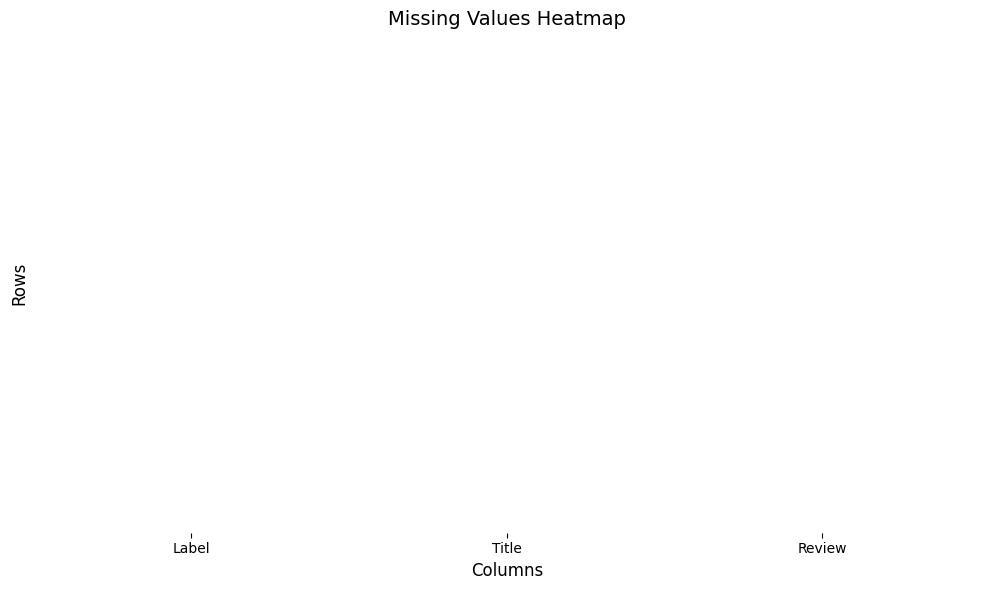

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(),
            cmap="Reds",
            cbar=False,
            yticklabels=False,
            linecolor='white',
            linewidths=0.5)
plt.title("Missing Values Heatmap", fontsize=14)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)
plt.tight_layout()
plt.show()

In [18]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
3599995,False
3599996,False
3599997,False
3599998,False


In [19]:
df.duplicated().sum()

np.int64(0)

#Data Analysis


/tmp/ipython-input-20-3903821667.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Label', palette='pastel', alpha=0.8)


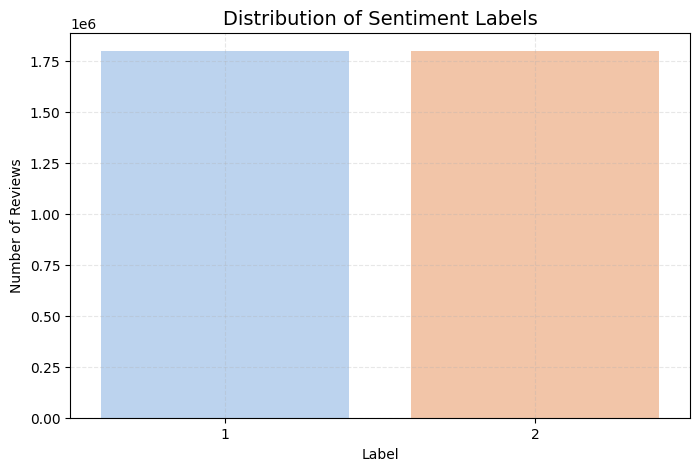

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Label', palette='pastel', alpha=0.8)
plt.title('Distribution of Sentiment Labels', fontsize=14)
plt.xlabel('Label')
plt.ylabel('Number of Reviews')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

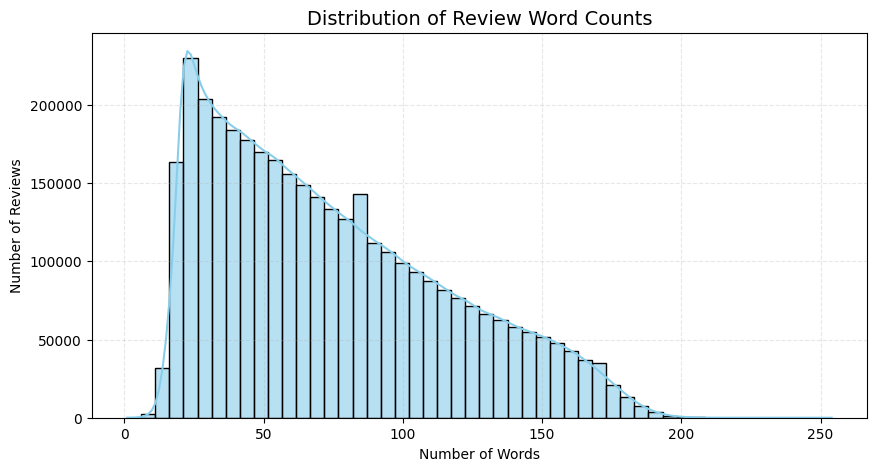

In [21]:
df['review_length'] = df['Review'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,5))
sns.histplot(df['review_length'], bins=50, kde=True, color='skyblue', alpha=0.6)
plt.title('Distribution of Review Word Counts', fontsize=14)
plt.xlabel('Number of Words')
plt.ylabel('Number of Reviews')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

/tmp/ipython-input-22-2899895909.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Label', y='title_length', palette='coolwarm', fliersize=2, linewidth=1.5)


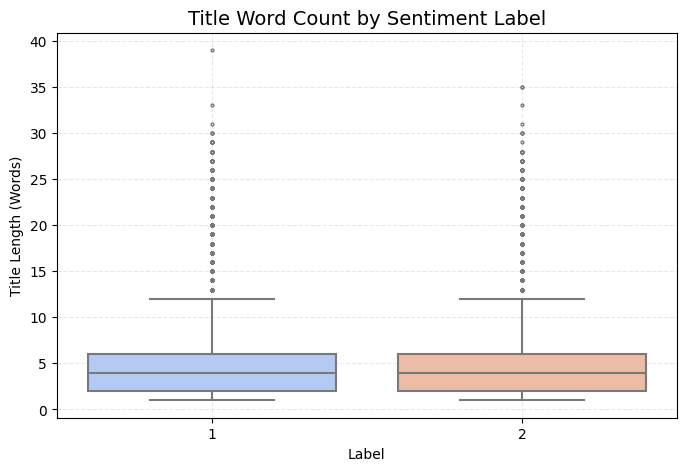

In [22]:
df['title_length'] = df['Title'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Label', y='title_length', palette='coolwarm', fliersize=2, linewidth=1.5)
plt.title('Title Word Count by Sentiment Label', fontsize=14)
plt.xlabel('Label')
plt.ylabel('Title Length (Words)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

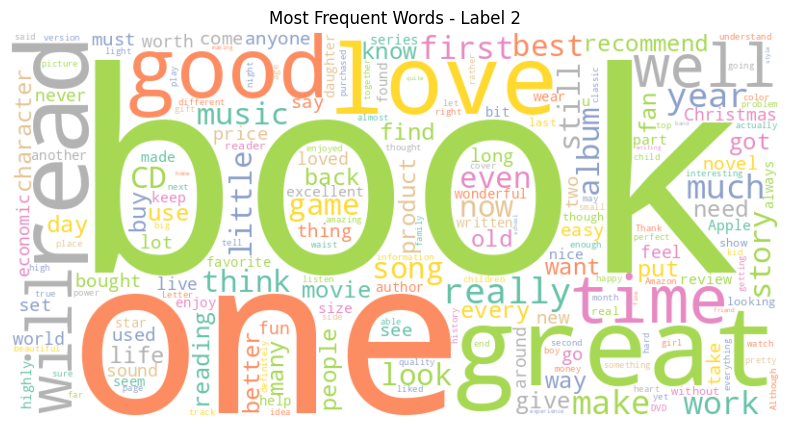

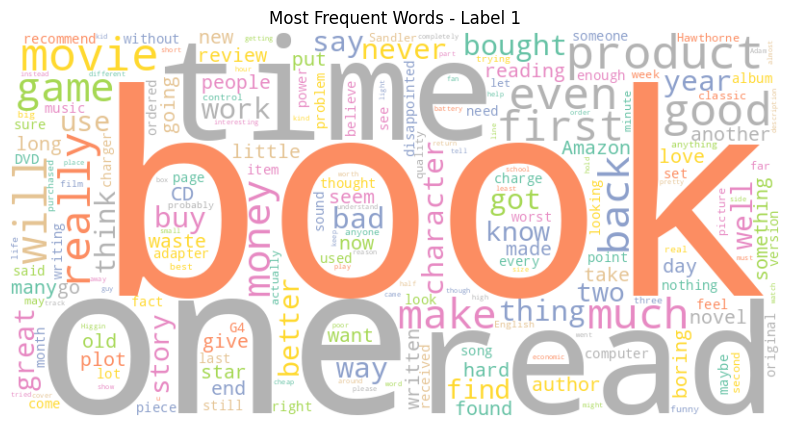

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for label in df['Label'].unique():
    # Limit to 1000 reviews per label
    reviews = df[df['Label'] == label]['Review'].dropna().astype(str).head(1000)

    text = " ".join(reviews)

    if len(text.strip()) == 0:
        print(f"No text for label {label}")
        continue

    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap='Set2', collocations=False).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Frequent Words - Label {label}')
    plt.show()


In [24]:
def clean_text(text):

    text = str(text)

    text = text.lower()

    text = re.sub(r'<.*?>', '', text)

    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    text = text.translate(str.maketrans('', '', string.punctuation))

    text = re.sub(r'\d+', '', text)

    text = re.sub(r'\s+', ' ', text).strip()

    return text

df['cleaned_review'] = df['Review'].apply(clean_text)

df[['Review', 'cleaned_review']].head()

,Review,cleaned_review
0,This sound track was beautiful! It paints the ...,this sound track was beautiful it paints the s...
1,I'm reading a lot of reviews saying that this ...,im reading a lot of reviews saying that this i...
2,This soundtrack is my favorite music of all ti...,this soundtrack is my favorite music of all ti...
3,I truly like this soundtrack and I enjoy video...,i truly like this soundtrack and i enjoy video...
4,"If you've played the game, you know how divine...",if youve played the game you know how divine t...


In [30]:
df_sample = df.sample(n=1000, random_state=42).reset_index(drop=True)

In [31]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()

vader_scores = df_sample['cleaned_review'].apply(vader.polarity_scores)

vader_df = pd.DataFrame(vader_scores.tolist())
df_sample = pd.concat([df_sample, vader_df], axis=1)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [32]:
def get_sentiment_label(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df_sample['vader_sentiment'] = df_sample['compound'].apply(get_sentiment_label)

# Convert Label column to text
def label_to_text(label):
    if str(label).strip() == '1':
        return 'negative'
    elif str(label).strip() == '2':
        return 'positive'
    else:
        return 'neutral'

df_sample['original_sentiment'] = df_sample['Label'].apply(label_to_text)

In [33]:
comparison = df_sample[['original_sentiment', 'vader_sentiment']]
comparison.value_counts().reset_index(name='count')

,original_sentiment,vader_sentiment,count
0,positive,positive,459
1,negative,positive,239
2,negative,negative,211
3,positive,negative,45
4,negative,neutral,35
5,positive,neutral,11


(Recommendations):

1. Improving the content of negatively rated products:

More than 20% of reviews rated "negative" by VADER were originally rated "positive" in the original data, indicating linguistic ambiguity or exaggerated descriptions that may need to be clarified on the product page.

2. Reviewing promotional phrases in product descriptions:

The results showed that VADER rated some positive phrases as "neutral" or "negative," indicating that some promotional texts may be linguistically ineffective and need to be reworded with simpler, more impactful language.

3. Adopting sentiment analysis as a support tool in product development:

VADER can be used periodically to monitor public sentiment around new products or marketing campaigns, and guide development teams based on customer satisfaction trends.

4. Sentiment Analysis as an Indicator of Customer Service Quality:

The significant discrepancy between the numerical rating (label) and VADER analysis indicates that some customers may be giving a high rating despite expressing clear dissatisfaction in text. Therefore, it is advisable to monitor actual text, not just the numbers.

5. Expanding the Analysis to Include Other Sources:

It is useful to use VADER on social media comments or Google Reviews ratings alongside Amazon to gain a comprehensive view of public opinion.